In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.cluster.hierarchy as sch

In [2]:
wine_data=pd.read_csv("wine.csv")
wine_data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
wine_data.shape

(178, 14)

In [4]:
wine_data.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [5]:
wine_data.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [6]:
wine_data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
wine1=wine_data.drop("Type",axis=1)
wine1

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [8]:
wine1.shape

(178, 13)

In [9]:
wine1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [10]:
wine1[wine1.duplicated(keep=False)]

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


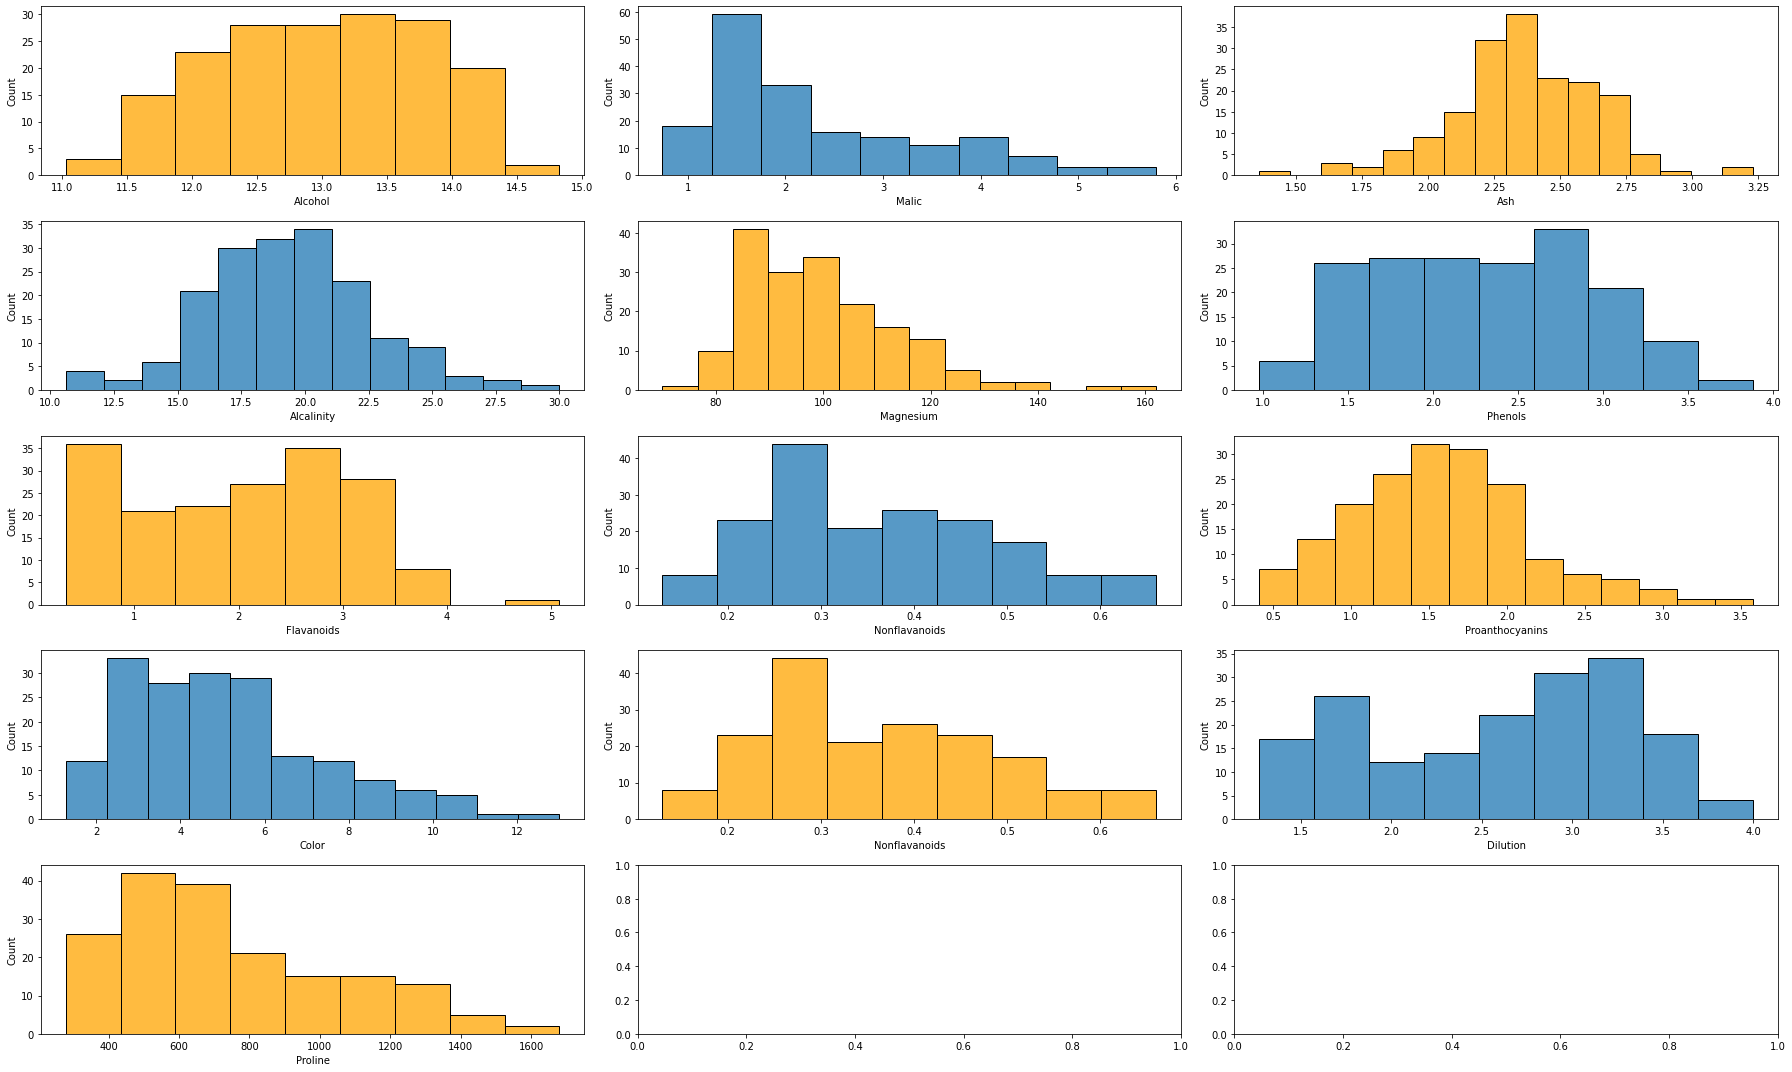

In [11]:
fig,ax=plt.subplots(5,3,figsize=(25,15))
sns.histplot(wine1.Alcohol,ax=ax[0,0],color='orange')
sns.histplot(wine1.Malic,ax=ax[0,1])
sns.histplot(wine1.Ash,ax=ax[0,2],color='orange')

sns.histplot(wine1.Alcalinity,ax=ax[1,0])
sns.histplot(wine1.Magnesium,ax=ax[1,1],color='orange')
sns.histplot(wine1.Phenols,ax=ax[1,2])

sns.histplot(wine1.Flavanoids,ax=ax[2,0],color='orange')
sns.histplot(wine1.Nonflavanoids,ax=ax[2,1])
sns.histplot(wine1.Proanthocyanins,ax=ax[2,2],color='orange')

sns.histplot(wine1.Color,ax=ax[3,0])
sns.histplot(wine1.Nonflavanoids,ax=ax[3,1],color='orange')
sns.histplot(wine1.Dilution,ax=ax[3,2])

sns.histplot(wine1.Proline,ax=ax[4,0],color='orange')
plt.tight_layout()
plt.show()

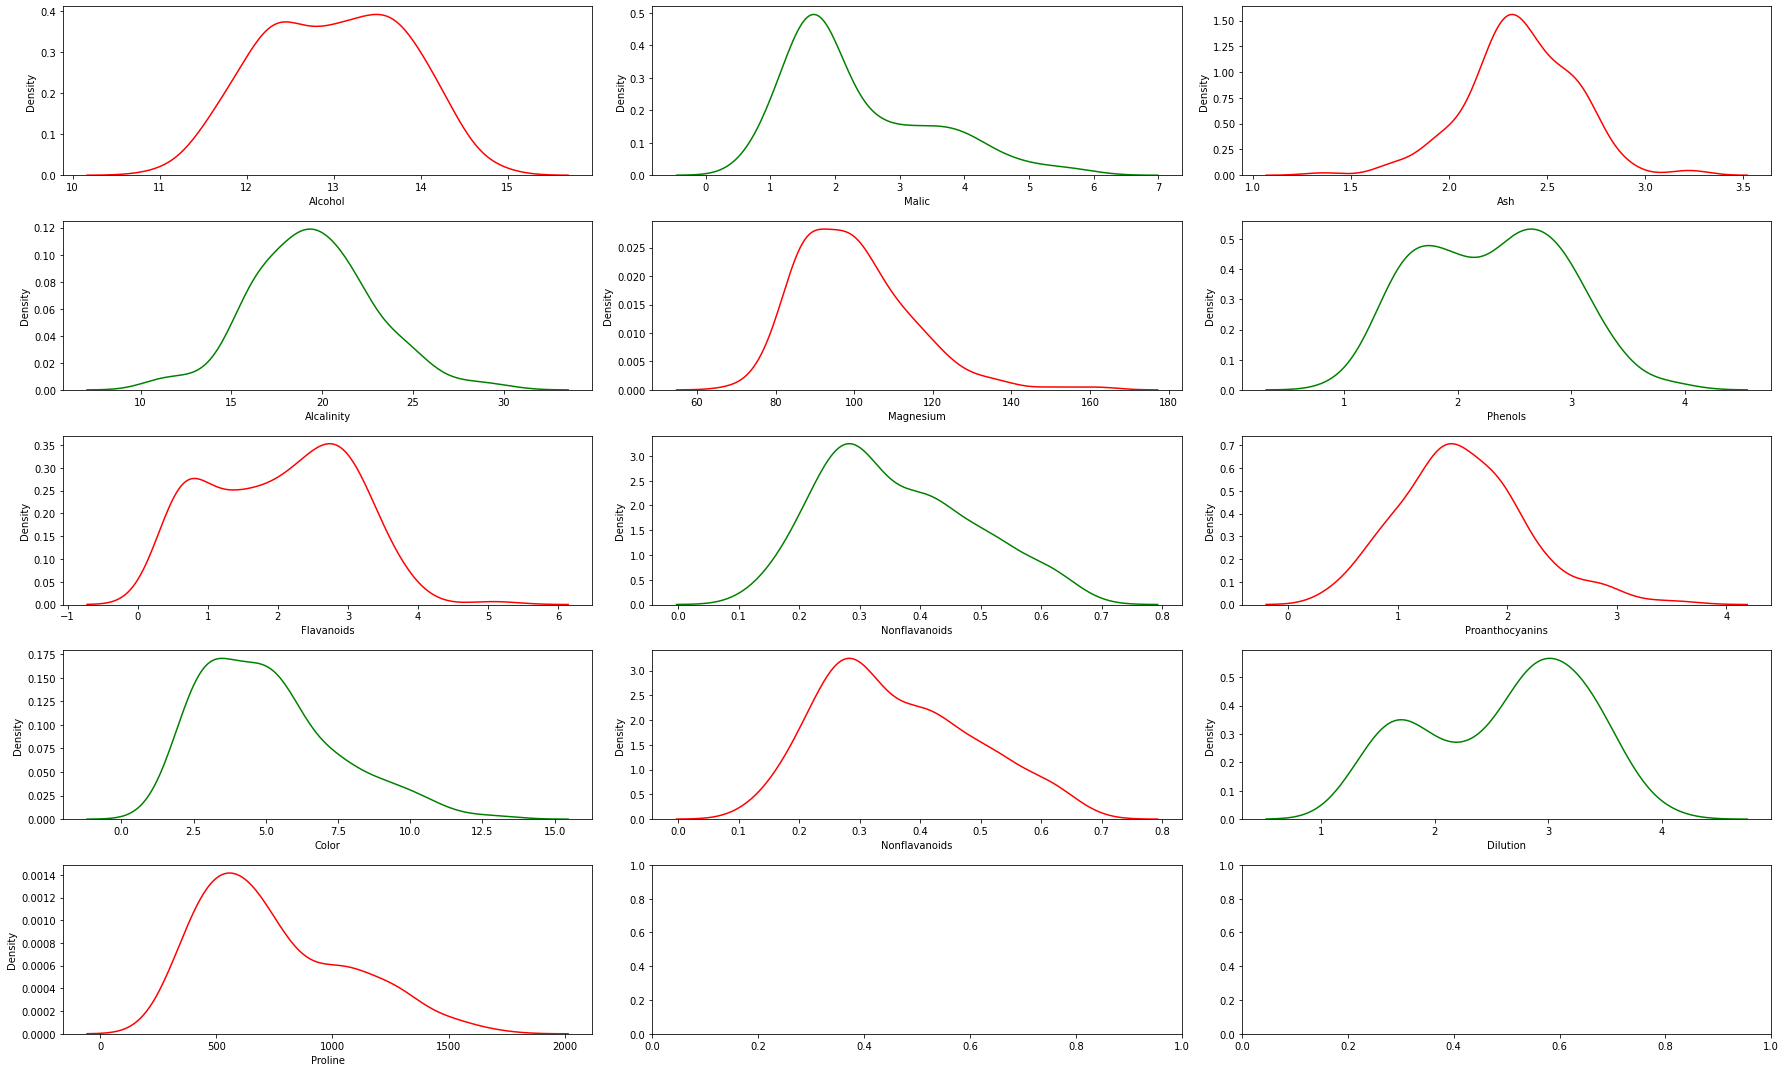

In [12]:
fig,ax=plt.subplots(5,3,figsize=(25,15))
sns.kdeplot(wine1.Alcohol,ax=ax[0,0],color='red')
sns.kdeplot(wine1.Malic,ax=ax[0,1],color='g')
sns.kdeplot(wine1.Ash,ax=ax[0,2],color='red')

sns.kdeplot(wine1.Alcalinity,ax=ax[1,0],color='g')
sns.kdeplot(wine1.Magnesium,ax=ax[1,1],color='red')
sns.kdeplot(wine1.Phenols,ax=ax[1,2],color='g')

sns.kdeplot(wine1.Flavanoids,ax=ax[2,0],color='red')
sns.kdeplot(wine1.Nonflavanoids,ax=ax[2,1],color='g')
sns.kdeplot(wine1.Proanthocyanins,ax=ax[2,2],color='red')

sns.kdeplot(wine1.Color,ax=ax[3,0],color='g')
sns.kdeplot(wine1.Nonflavanoids,ax=ax[3,1],color='red')
sns.kdeplot(wine1.Dilution,ax=ax[3,2],color='g')

sns.kdeplot(wine1.Proline,ax=ax[4,0],color='red')
plt.tight_layout()
plt.show()

In [13]:
from sklearn.preprocessing import scale
wine_norm=scale(wine1)
wine_norm

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

## Performing the hierarchial clustering using different types of linkage models

Here initially hierarchial clustering is performed on different types of linkage models and its performance is checked,and then PCA is performed on it 

## Performing Simple linkage model

Text(0.5, 1.0, 'Single Linkage Dendrogram')

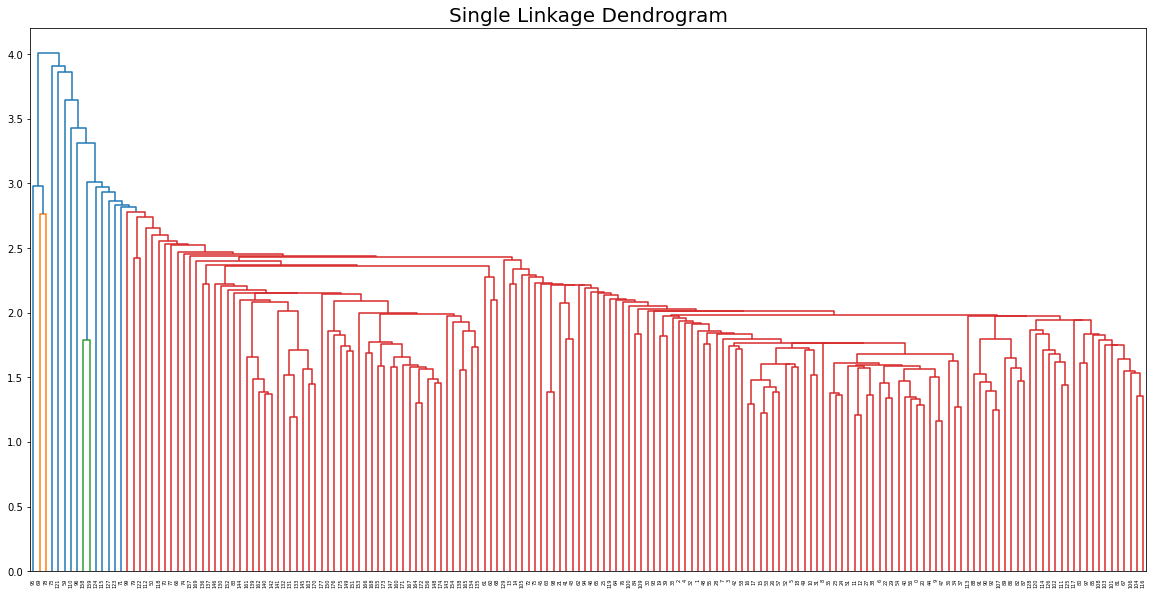

In [14]:
fig=plt.figure(figsize=(20,10))
dendrogram=sch.dendrogram(sch.linkage(wine_norm,method='single'))
plt.title("Single Linkage Dendrogram",size=20)

In [15]:
from sklearn.cluster import AgglomerativeClustering
hc1=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='single') #building single linkage model

# Performing complete linkage

Text(0.5, 1.0, 'Complete Linkage Dendrogram')

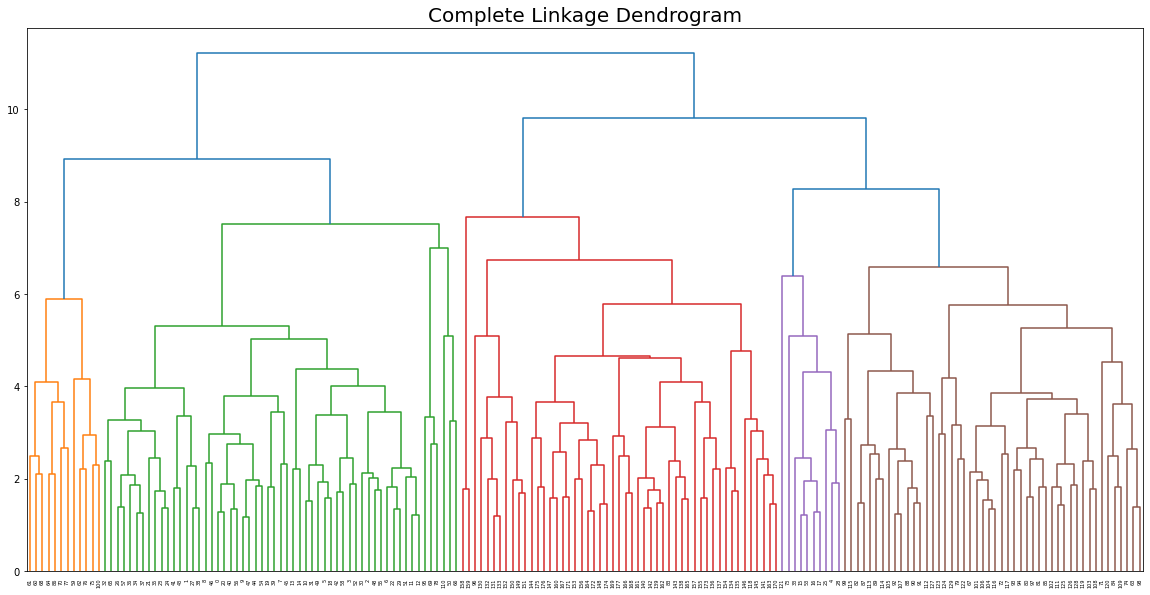

In [16]:
fig=plt.figure(figsize=(20,10))
dendrogram=sch.dendrogram(sch.linkage(wine_norm,method='complete'))
plt.title("Complete Linkage Dendrogram",size=20)

In [17]:
hc2=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete') #building complete linkage model

In [18]:
#fitting the model on the data
y_hc2=hc2.fit_predict(wine_norm)
Clusters=pd.DataFrame(y_hc2,columns=['Clusters'])

#creating the cluster column for the build model
wine_data['clusters']=y_hc2

In [19]:
#Checking how many values fall under each of the cluster created
for i in range(4):
    print("cluster",i)
    print("Total values",len(list(wine_data[wine_data['clusters']==i]['Type'].values)))

cluster 0
Total values 58
cluster 1
Total values 57
cluster 2
Total values 51
cluster 3
Total values 12


# Perform average linkage model

Text(0.5, 1.0, 'Average Linkage Dendrogram')

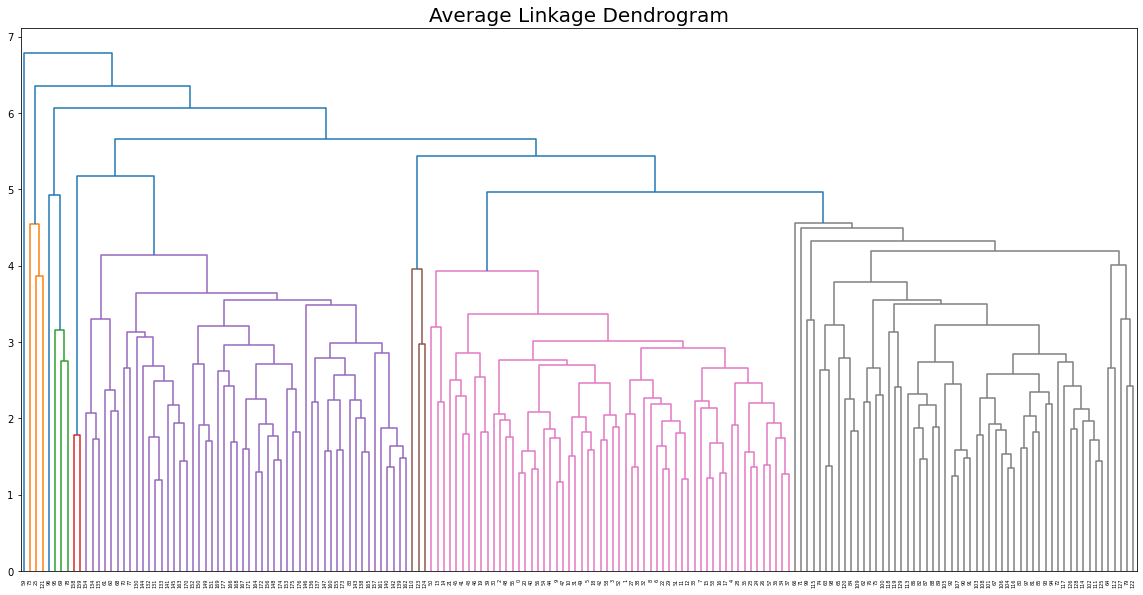

In [20]:
fig=plt.figure(figsize=(20,10))
dendrogram=sch.dendrogram(sch.linkage(wine_norm,method='average'))
plt.title("Average Linkage Dendrogram",size=20)

In [21]:
hc3=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='average')

In [22]:
y_hc3=hc3.fit_predict(wine_norm)
Clusters=pd.DataFrame(y_hc3,columns=['Clusters'])

#creating the cluster column for the build model
wine_data['clusters']=y_hc3

In [23]:
for i in range(5):
    print("cluster",i)
    print("Total values",len(list(wine_data[wine_data['clusters']==i]['Type'].values)))

cluster 0
Total values 170
cluster 1
Total values 4
cluster 2
Total values 3
cluster 3
Total values 1
cluster 4
Total values 0


# Performing Centroid(ward) linkage model

Text(0.5, 1.0, 'Centroid Linkage Dendrogram')

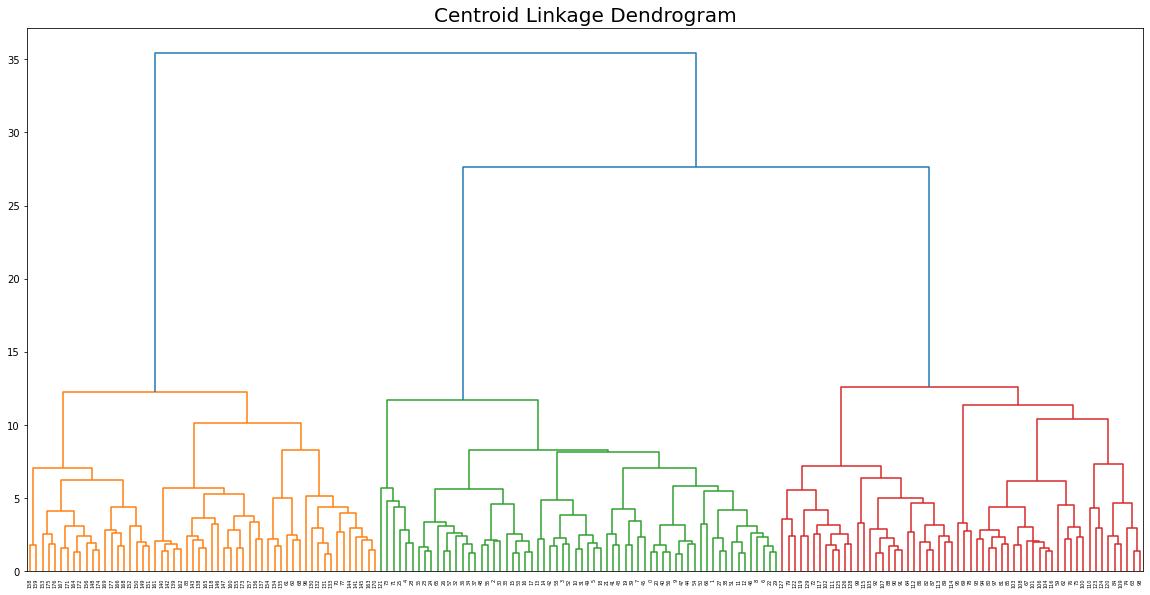

In [24]:
fig=plt.figure(figsize=(20,10))
dendrogram=sch.dendrogram(sch.linkage(wine_norm,method='ward'))
plt.title("Centroid Linkage Dendrogram",size=20)

In [25]:
hc4=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')

In [26]:
y_hc4=hc4.fit_predict(wine_norm)
Clusters=pd.DataFrame(y_hc4,columns=['Clusters'])

#creating the cluster column for the build model
wine_data['clusters']=y_hc4

In [27]:
for i in range(3):
    print("cluster",i)
    print("Total values",len(list(wine_data[wine_data['clusters']==i]['Type'].values)))

cluster 0
Total values 56
cluster 1
Total values 30
cluster 2
Total values 64


# Performing KMeans Clustering

In [28]:
from sklearn.cluster import KMeans
wcss=[]

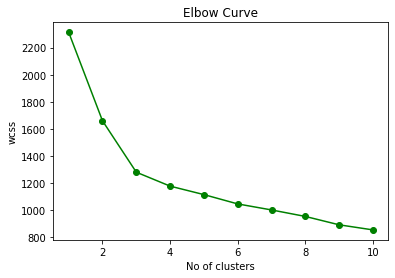

In [29]:
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(wine_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss,'bo-',color='g')
plt.title('Elbow Curve')
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.show()

In [30]:
clusters_newdata=KMeans(3,random_state=42)
clusters_newdata.fit(wine_norm)

KMeans(n_clusters=3, random_state=42)

In [31]:
Kmeans_label=clusters_newdata.labels_
wine_data['clusters']=clusters_newdata.labels_

In [32]:
for i in range(3):
    print("cluster",i)
    print("Total values",len(list(wine_data[wine_data['clusters']==i]['Type'].values)))

cluster 0
Total values 51
cluster 1
Total values 62
cluster 2
Total values 65


# Evaluating clustering methods with the help of silhouette score

In [33]:
from sklearn import metrics
silhou_slm=metrics.silhouette_score(wine_norm,y_hc2)
silhou_slm

0.19382526203175696

In [34]:
silhou_avg=metrics.silhouette_score(wine_norm,y_hc3)
silhou_avg

0.14900318238951352

In [35]:
silhou_cenlm=metrics.silhouette_score(wine_norm,y_hc4)
silhou_cenlm

0.225836659334758

In [36]:
silhou_kmeans=metrics.silhouette_score(wine_norm,Kmeans_label)
silhou_kmeans

0.2848589191898987

In [37]:
Tables={'model':pd.Series(['hc_singlelinkage','hc_average linkage','hc_centroid linkage','Kmeans']),
        'silhouette_score':[silhou_slm,silhou_avg,silhou_cenlm,silhou_kmeans]}
tables=pd.DataFrame(Tables)
tables

,model,silhouette_score
0,hc_singlelinkage,0.193825
1,hc_average linkage,0.149003
2,hc_centroid linkage,0.225837
3,Kmeans,0.284859


# PCA Method

In [38]:
from sklearn.decomposition import PCA
pca=PCA()

In [39]:
pca_values=pca.fit_transform(wine_norm)
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [40]:
pca=PCA(n_components=13)
pca_values=pca.fit_transform(wine_norm)

In [41]:
var=pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

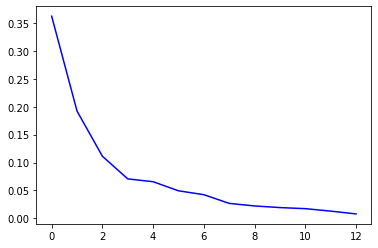

In [42]:
plt.plot(var,color='blue')

In [43]:
varc=np.cumsum(np.round(var,decimals=4)*100)
varc

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

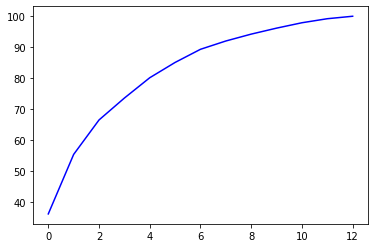

In [44]:
plt.plot(varc,color='blue')

In [45]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

In [46]:
pca_wine=pca_values[:,0:3]

# Performing single linkage on component3

Text(0.5, 1.0, 'Single Linkage Dendrogram')

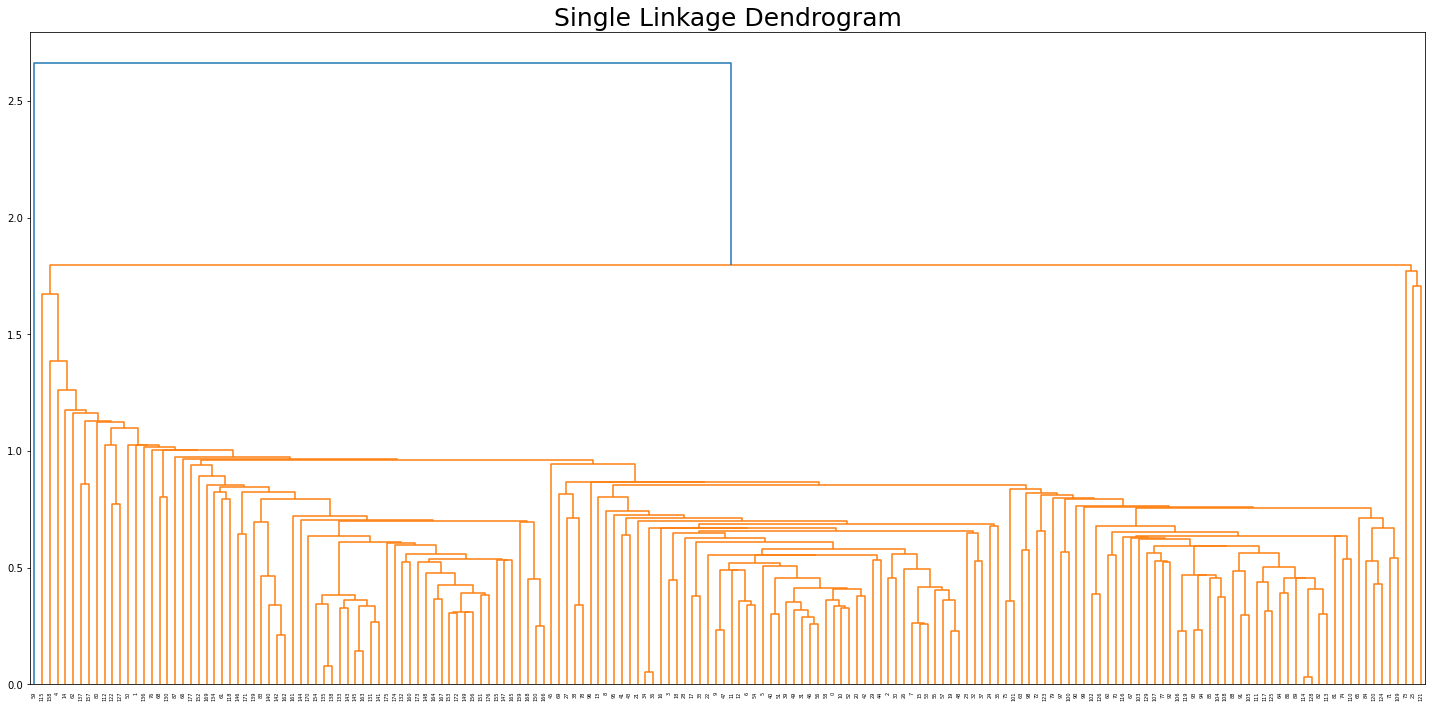

In [47]:
fig=plt.figure(figsize=(25,12))
dendrogram=sch.dendrogram(sch.linkage(pca_wine,method='single'))
plt.title("Single Linkage Dendrogram",size=25)

In [48]:
pca_hc1=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='single')

In [49]:
y_pcahc1=pca_hc1.fit_predict(pca_wine)
Clusters=pd.DataFrame(y_pcahc1,columns=['Clusters'])

#creating the cluster column for the build model
wine_data['clusters']=y_pcahc1

In [50]:
for i in range(2):
    print("cluster",i)
    print("Total values",len(list(wine_data[wine_data['clusters']==i]['Type'].values)))

cluster 0
Total values 177
cluster 1
Total values 1


# Performing complete linkage on component3

Text(0.5, 1.0, 'Complete Linkage Dendrogram')

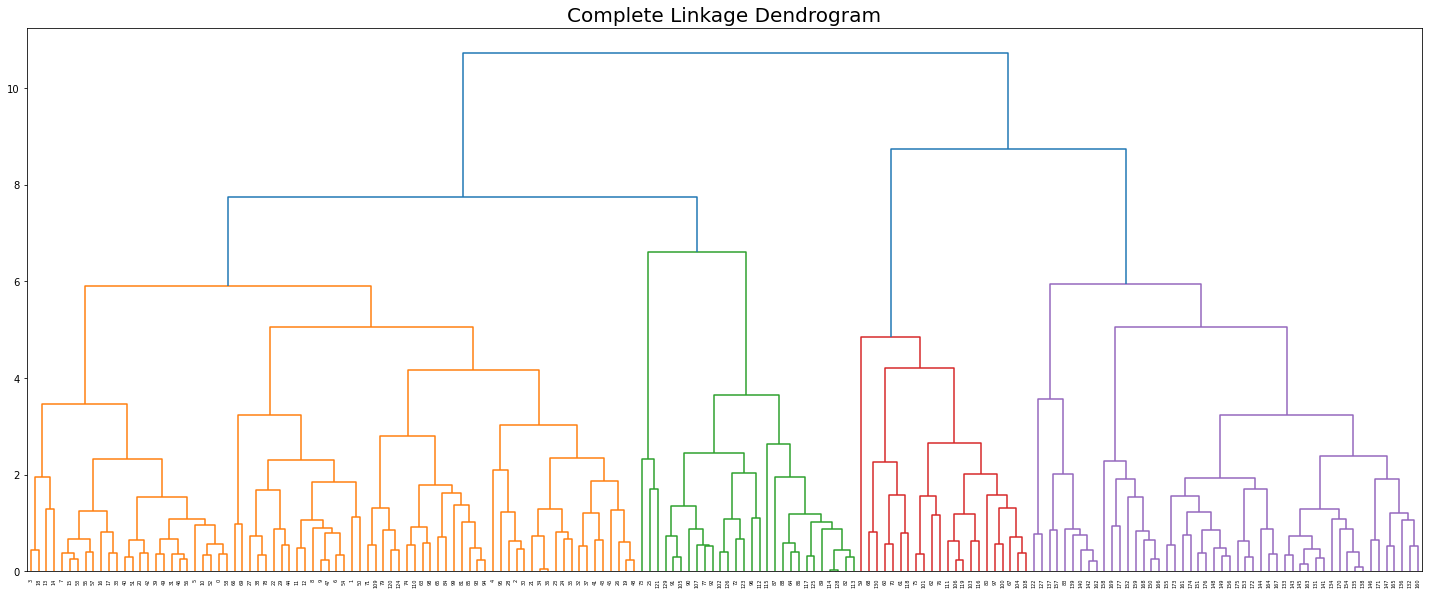

In [51]:
fig=plt.figure(figsize=(25,10))
dendrogram=sch.dendrogram(sch.linkage(pca_wine,method='complete'))
plt.title("Complete Linkage Dendrogram",size=20)

In [52]:
pca_hc2=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')

In [53]:
y_pcahc2=pca_hc2.fit_predict(pca_wine)
Clusters=pd.DataFrame(y_pcahc2,columns=['Clusters'])

#creating the cluster column for the build model
wine_data['clusters']=y_pcahc2

In [54]:
for i in range(4):
    print("cluster",i)
    print("Total values",len(list(wine_data[wine_data['clusters']==i]['Type'].values)))

cluster 0
Total values 28
cluster 1
Total values 50
cluster 2
Total values 22
cluster 3
Total values 78


# Performing avg linkage on component3

Text(0.5, 1.0, 'Average Linkage Dendrogram')

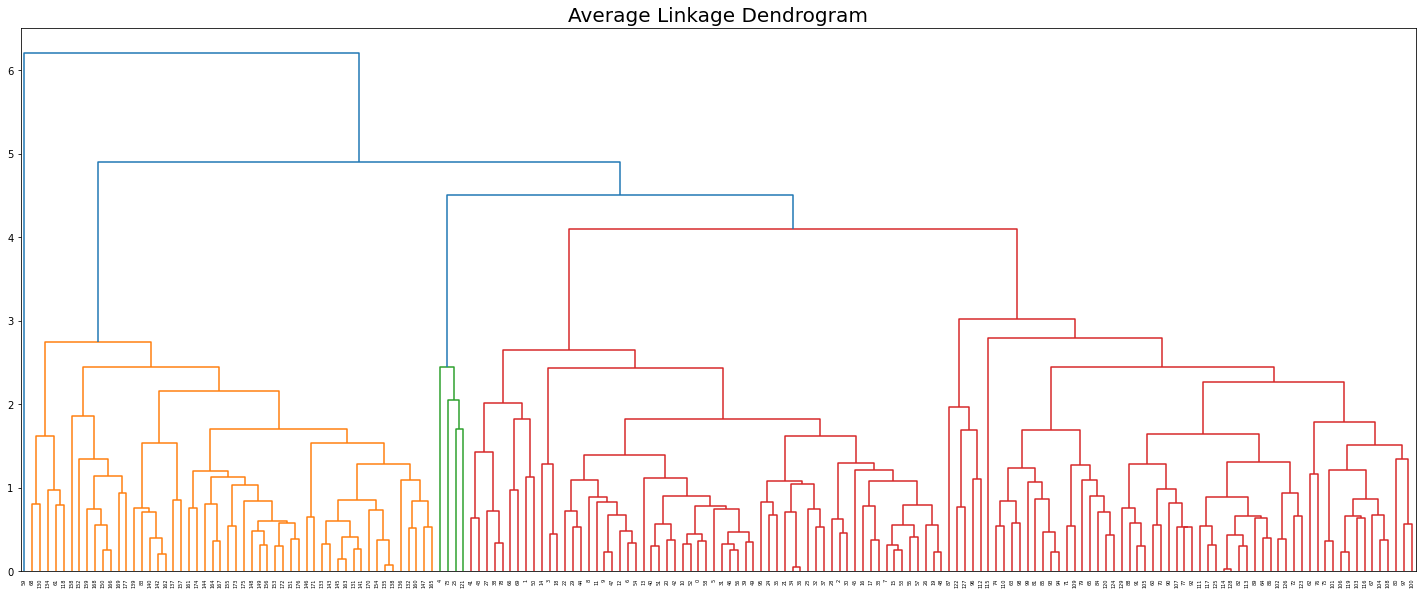

In [55]:
fig=plt.figure(figsize=(25,10))
dendrogram=sch.dendrogram(sch.linkage(pca_wine,method='average'))
plt.title("Average Linkage Dendrogram",size=20)

In [56]:
pca_hc3=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='average')

In [57]:
y_pcahc3=pca_hc3.fit_predict(pca_wine)
Clusters=pd.DataFrame(y_pcahc3,columns=['Clusters'])

#creating the cluster column for the build model
wine_data['clusters']=y_pcahc3

In [58]:
for i in range(5):
    print("cluster",i)
    print("Total values",len(list(wine_data[wine_data['clusters']==i]['Type'].values)))

cluster 0
Total values 60
cluster 1
Total values 61
cluster 2
Total values 52
cluster 3
Total values 1
cluster 4
Total values 4


# Performing centroid linkage on component3

Text(0.5, 1.0, 'Complete Linkage Dendrogram')

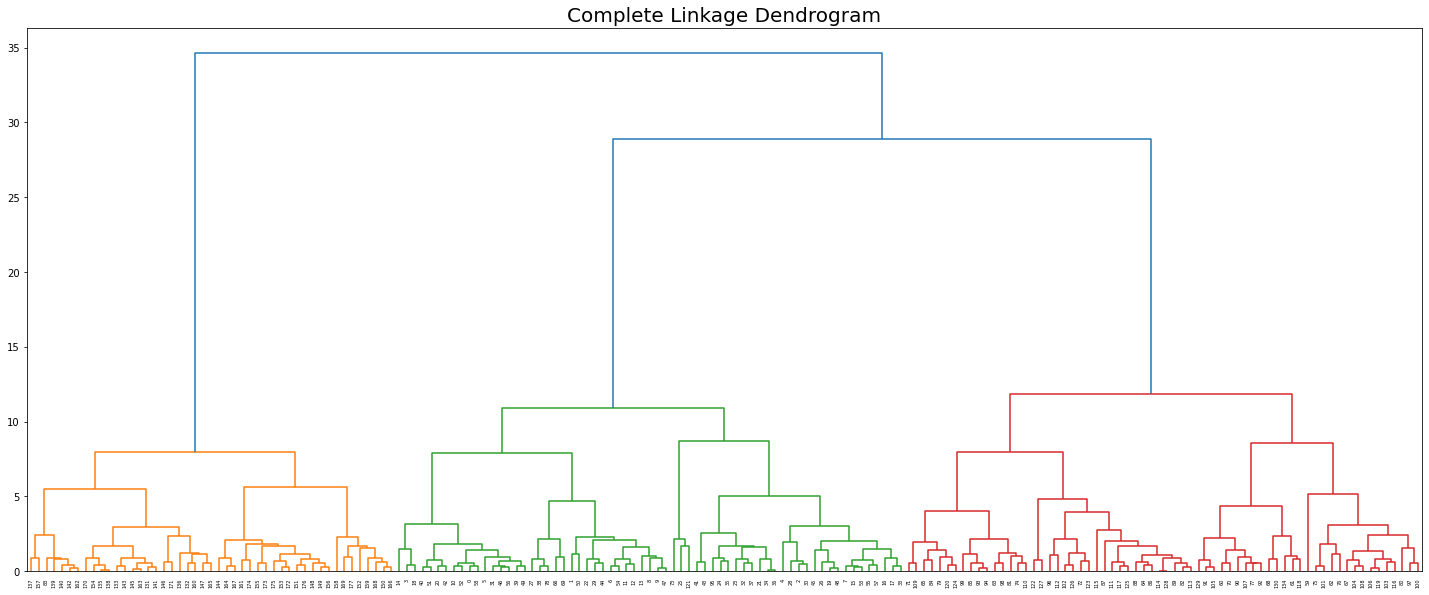

In [59]:
fig=plt.figure(figsize=(25,10))
dendrogram=sch.dendrogram(sch.linkage(pca_wine,method='ward'))
plt.title("Complete Linkage Dendrogram",size=20)

In [60]:
pca_hc4=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [61]:
y_pcahc4=pca_hc4.fit_predict(pca_wine)
Clusters=pd.DataFrame(y_pcahc4,columns=['Clusters'])

#creating the cluster column for the build model
wine_data['clusters']=y_pcahc4

In [62]:
for i in range(3):
    print("cluster",i)
    print("Total values",len(list(wine_data[wine_data['clusters']==i]['Type'].values)))

cluster 0
Total values 66
cluster 1
Total values 47
cluster 2
Total values 65


# Performing KMeans Clustering on 3 component

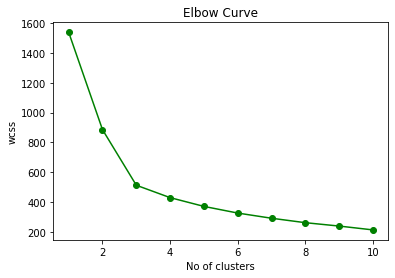

In [63]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(pca_wine)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss,'bo-',color='g')
plt.title('Elbow Curve')
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.show()

In [64]:
clusters_newdata=KMeans(3,random_state=42)
clusters_newdata.fit(pca_wine)

KMeans(n_clusters=3, random_state=42)

In [65]:
Kmeans_label=clusters_newdata.labels_
wine_data['clusters']=clusters_newdata.labels_

In [66]:
for i in range(3):
    print("cluster",i)
    print("Total values",len(list(wine_data[wine_data['clusters']==i]['Type'].values)))

cluster 0
Total values 51
cluster 1
Total values 62
cluster 2
Total values 65


# Evaluating PCA clustering methods with the help of silhouette score

The Silhouette score metric calculate the goodness of the clustering techniques and it ranges from -1 to 1.

1:Mean clusters are well apart from each other and clearly distinguised

0:Means the distance between clusters is not significant

-1:Means clusters are assigned in the wrong way

In [67]:
pca_silhou_slm=metrics.silhouette_score(pca_wine,y_pcahc1)
pca_silhou_slm

0.3631067305104142

In [68]:
pca_silhou_comlm=metrics.silhouette_score(pca_wine,y_pcahc2)
pca_silhou_comlm

0.35784842685673074

In [69]:
pca_silhou_ALM=metrics.silhouette_score(pca_wine,y_pcahc3)
pca_silhou_ALM

0.4465449278023582

In [70]:
pca_silhou_cenLM=metrics.silhouette_score(pca_wine,y_pcahc4)
pca_silhou_cenLM

0.44594921980629687

In [71]:
pca_silhou_kmeans=metrics.silhouette_score(pca_wine,Kmeans_label)
pca_silhou_kmeans

0.45379998482576156

In [72]:
Tables1={'model':pd.Series(['pca_singlelinkage','pca_completelinkage','pca_average linkage','pca_centroid linkage','pca_Kmeans']),
        'silhouette_score':[pca_silhou_slm,pca_silhou_comlm,pca_silhou_ALM,pca_silhou_cenLM,pca_silhou_kmeans]}
tables1=pd.DataFrame(Tables1)
tables1

,model,silhouette_score
0,pca_singlelinkage,0.363107
1,pca_completelinkage,0.357848
2,pca_average linkage,0.446545
3,pca_centroid linkage,0.445949
4,pca_Kmeans,0.453800


In [73]:
Final={'model_hc':pd.Series(['hc_singlelinkage','hc_average linkage','hc_centroid linkage','Kmeans']),
        'hc_silhouette_score':[silhou_slm,silhou_avg,silhou_cenlm,silhou_kmeans],
       'model_pca':pd.Series(['pca_singlelinkage','pca_average linkage','pca_centroid linkage','pca_Kmeans']),
        'pca_silhouette_score':[pca_silhou_slm,pca_silhou_ALM,pca_silhou_cenLM,pca_silhou_kmeans]
      }
Final=pd.DataFrame(Final)
Final

,model_hc,hc_silhouette_score,model_pca,pca_silhouette_score
0,hc_singlelinkage,0.193825,pca_singlelinkage,0.363107
1,hc_average linkage,0.149003,pca_average linkage,0.446545
2,hc_centroid linkage,0.225837,pca_centroid linkage,0.445949
3,Kmeans,0.284859,pca_Kmeans,0.453800


# Insights Drawn

From the above table it depicts that before performing PCA the cluster result is similar.But,after performing PCA, we gain a double silhouette_score,which means the complexity or overlaping the data is decreased after performing PCA